<div id= 'main'>
    <h1><p style= 'text-align:center;'>Research</p></h1>
</div>

<html>

<h2>Chapters - Table of Content</h2>


<div id = 'toc' class='alert alert-block alert-info' style='margin-top: 20px'>
    <ol>
        <li><a href='#course1'>Chapter 1 - Research</a><br><br>
            <ol>
                <li><a href = '#1.1' style='text-decoration: none;'>Section 1.1 - EDA</a></li>
                <li><a href = '#1.2'>Section 1.2 - Data Cleaning</a></li>
            </ol>
        </li><p><hr><p> <!-- course 1 finnito -->
    </ol>    
</div>
</html>

<br> <hr> <br> <br>

<div id= '1'></div>

# Chapter 1  - Research

<br>
<div id= '1.1'></div>

### Section 1.1 - EDA

*[Go to top](#toc)*

In [41]:
import jovian
jovian.commit( new_project= 'Project - unsupervised classification' )

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/madhurdevkota/project-notebook-sb-i


'https://jovian.ai/madhurdevkota/project-notebook-sb-i'

In [18]:
gri_df = pd.read_csv( 'dataset/obsvData_watershed_Sjoin.csv' )

In [34]:
plt.style.use( 'classic' )
gri_df.shape

(189, 45)

In [20]:
# normalize some features
feature_to_norm = [  'no3_no2', 'po4', 'no2', 'nh4', 'a254', 'a440', 'sr', 'hixo', 'fix', 'bix',
                     'v11_water', 'v21_urban', 'v31_barren', 'v41_forest', 'v52_rangeland', 'v81_hayPasture',
                     'v82_argo', 'v90_wetland',
                     'r11_water', 'r21_urban', 'r31_barren', 'r41_forest', 'r52_rangeland', 'r81_hayPasture',
                     'r82_argo', 'r90_wetland', 'c1', 'c2', 'c3'  ]

xNorm_df = pd.DataFrame(  data= sklearn.preprocessing.MinMaxScaler().fit_transform(gri_df[feature_to_norm]),
                          columns= feature_to_norm  )

xNorm_df.head(3)

,no3_no2,po4,no2,nh4,a254,a440,sr,hixo,fix,bix,v11_water,v21_urban,v31_barren,v41_forest,v52_rangeland,v81_hayPasture,v82_argo,v90_wetland,r11_water,r21_urban,r31_barren,r41_forest,r52_rangeland,r81_hayPasture,r82_argo,r90_wetland,c1,c2,c3
0,0.046827,0.025813,0.011015,0.032936,0.108785,0.178151,0.014064,0.735529,0.371023,0.129965,0.036629,0.053545,0.386077,0.582000,0.392055,0.054222,0.087908,0.103418,0.014291,0.068048,0.097712,0.722270,0.534464,0.078746,0.144189,0.133549,0.738334,0.645543,0.316312
1,0.230064,0.168260,0.128970,0.046242,0.046244,0.077129,0.014064,0.738341,0.558592,0.242087,0.048989,0.046608,0.016516,0.830217,0.138745,0.005132,0.022783,0.268051,0.016694,0.051486,0.003617,0.895873,0.164473,0.006484,0.032491,0.307013,0.582842,0.588988,0.299624
2,0.005514,0.039197,0.004171,0.001150,0.002338,0.015647,0.014059,0.280951,0.493619,0.122511,0.026384,0.115974,0.434559,0.920174,0.371010,0.123580,0.013458,0.066853,0.007886,0.119762,0.089403,0.928032,0.411004,0.145871,0.017938,0.067474,0.776834,0.785712,0.500902


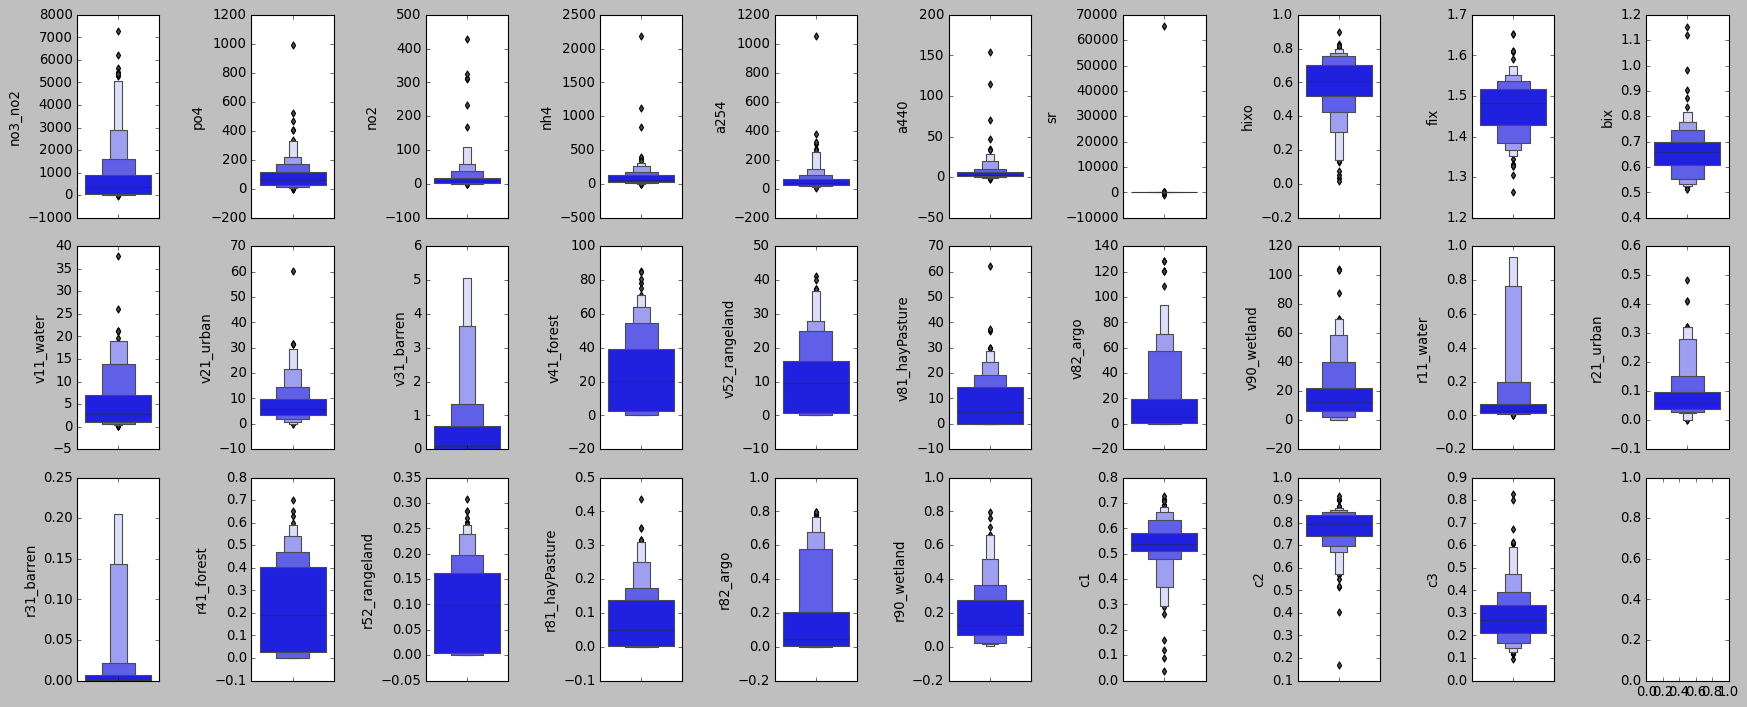

In [21]:
# distribution prior to normalization
ncol = 10
nrow = math.ceil(  len(feature_to_norm)/ncol )

fg, ax = plt.subplots( nrow,ncol, figsize= (22,3*nrow) )
for e_c, e_ax in zip( feature_to_norm, ax.flatten() ):
    sns.boxenplot( y= gri_df[e_c], ax= e_ax )
plt.tight_layout(); plt.show()

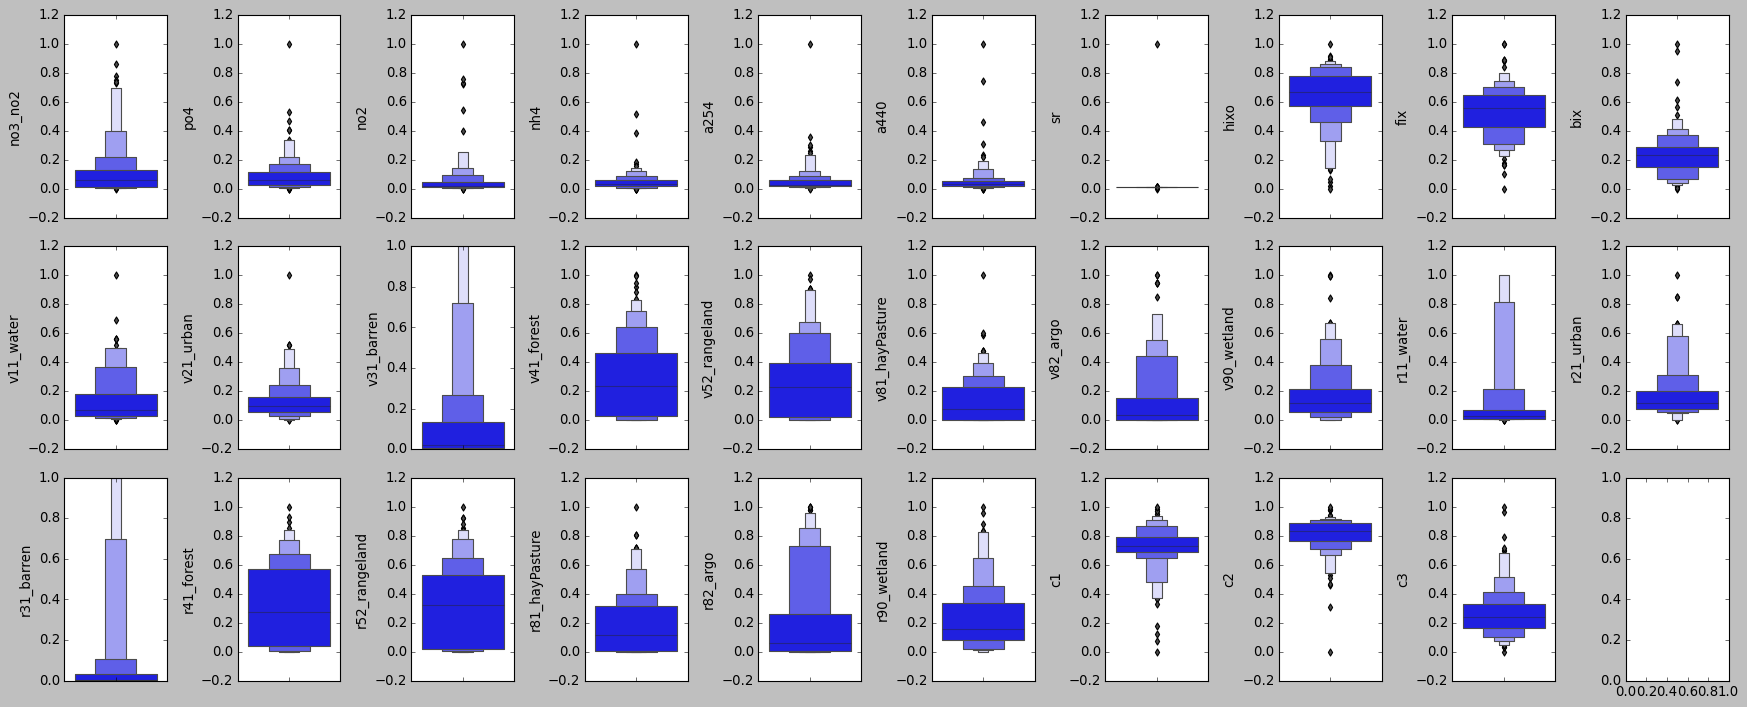

In [22]:
# distribution of  normalization
ncol = 10
nrow = math.ceil(  len(feature_to_norm)/ncol )

fg, ax = plt.subplots( nrow,ncol, figsize= (22,3*nrow) )
for e_c, e_ax in zip( feature_to_norm, ax.flatten() ):
    sns.boxenplot( y= xNorm_df[e_c], ax= e_ax )
plt.tight_layout(); plt.show()

<div class= 'span5 alert alert-info'>
<h3>Action:</h3>

<p><b>
Based on this we need to normalize all the columns except the ratios (r11_water, r21_urban, etc.) and c's (c1,c2,c3). But before that we need to fix some data issue - by imputing various features for bad data.
</b></p>
</div>


<br>
<div id= '1.2'></div>

### Section 1.2 - Data Cleaning

*[Go to top](#toc)*


### `missingpy` library

`Missingpy` is a library in python used for imputations of missing values. Currently, it supports `K-Nearest Neighbours` based imputation technique and `MissForest` i.e `Random Forest`-based imputation technique.

#### ` KNNImputer`
KNNImputer is a multivariate data imputation technique used for filling in the missing values using the K-Nearest Neighbours approach. The mean value fills each missing value from the n nearest neighbours found in the training set, either weighted or unweighted.
If a sample has more than one feature missing, then the neighbour for that sample can be different. If the number of neighbours is lesser than n_neighbour specified, there is no defined distance in the training set. The average of that training set is used during imputation.
Nearest neighbours are selected based on distance metrics; by default, it is set to euclidean distance, and n_neighbour are specified to consider for each step.

#### `MissForest`

It is another technique used to fill in the missing values using Random Forest in an iterated fashion. The candidate column is selected from all the columns having the least number of missing values.
In the first step, all the other columns, i.e. non-candidate columns having missing values, are filled with the mean for the numerical columns and the categorical columns. After that, imputer fits a random forest model with the candidate columns as the outcome variable(target variable) and remaining columns as independent variables and then filling the missing values in the candidate column using the predictions from the fitted Random Forest model.
Then the imputer moves on, and the next candidate column is selected with the second least number of missing values, and the process repeats itself for each column with the missing values.   

<br><p>
<b>
Based on the above imputation techniques, we will choose `MissForest` instead of `KNNImputer` as `KNNImputer` has following shortcomings: </b>
    
- is sensitive to outliers because it uses Euclidean distance below the surface
- can’t be directly applied to categorical data, as some form of conversion to numerical representation is required
- if the number of neighbours is lesser than n_neighbour specified, there is no defined distance in the training set

    <b> `MissForrest` works well as it:</b>
    
- doesn’t require extensive data preparation — as a Random forest algorithm can determine which features are important
- doesn’t require any tuning — like K in K-Nearest Neighbors
- doesn’t care about categorical data types — Random forest knows how to handle them

<br>

<div class= 'span5 alert alert-info'>
<h3>Action:</h3>

<p><b>
Imputing data using MissForest
</b></p>
</div>

In [29]:
# !pip install missingpy

  Using cached missingpy-0.2.0-py3-none-any.whl (49 kB)


In [25]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import missingpy

In [26]:
gri_df = pd.read_csv( 'dataset/obsvData_watershed_Sjoin.csv' )

## replacing outliers and illegit values with nan and then imputing 
toReplace_dictn = {  'a254'     :  list( gri_df.loc[ (gri_df['a254']<0) | (gri_df['a254']>=400), 'a254' ] ) ,
                     'a440'     :  list( gri_df.loc[ (gri_df['a440']<0) | (gri_df['a440']>=20), 'a440' ] ),
                     'sr'       :  list( gri_df.loc[ (gri_df['sr']<0) | (gri_df['sr']>=20), 'sr' ] ),
                     'no3_no2'  :  list( gri_df.loc[ gri_df['no3_no2']<0, 'no3_no2' ] ),
                     'no2'      :  list( gri_df.loc[ gri_df['no2']<0, 'no2' ] ),
                     'po4'      :  list( gri_df.loc[ (gri_df['po4']<0) | (gri_df['po4']>=900), 'po4' ] ),
                     'nh4'      :  list( gri_df.loc[ (gri_df['nh4']<0) | (gri_df['nh4']>=1500), 'nh4' ] )
                  }

griNAN_df =   gri_df.replace( to_replace= toReplace_dictn, value= np.nan )

## converting categorical col (waterbody) into OHE

OHEncoder_obj = sklearn.preprocessing.OneHotEncoder( sparse= False, drop= 'first', dtype= int )
OHEncoder_np = OHEncoder_obj.fit_transform( griNAN_df[['waterbody_type']] )
OHEncoder_df = pd.DataFrame( OHEncoder_np, index= griNAN_df.index,
                             columns= OHEncoder_obj.get_feature_names_out( ['waterbody_type'] )  )

griNAN_df = griNAN_df.merge( OHEncoder_df, left_index= True, right_index= True )
griNAN_df.rename(  columns= { 'waterbody_type_MS Sound': 'waterbody_type_MSSound' }, inplace= True  )

# feature column
featureCol_ls = [ 'no3_no2', 'po4', 'no2', 'nh4', 'a254', 'a440', 'sr', 'hixo', 'fix', 'bix', 'c1','c2','c3',
                  'v11_water', 'v21_urban', 'v31_barren', 'v41_forest', 'v52_rangeland', 'v81_hayPasture',
                  'v82_argo','v90_wetland',
                  'r11_water', 'r21_urban', 'r31_barren', 'r41_forest', 'r52_rangeland', 'r81_hayPasture',
                  'r82_argo', 'r90_wetland', 
                  'waterbody_type_MSSound', 'waterbody_type_River'                
                ]

## impute NAN values
import sklearn.neighbors._base, missingpy
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
gri_imputed_df = missingpy.MissForest( max_iter= 200, n_estimators= 150, criterion= 'squared_error',
                                       missing_values= np.nan, n_jobs= -1 )\
                                .fit_transform( griNAN_df[featureCol_ls] )
gri_imputed_df = pd.DataFrame( gri_imputed_df, columns= featureCol_ls, dtype= float )
gri_imputed_ori_df = gri_imputed_df.copy()

## normalize
feature_to_norm = [  'no3_no2', 'po4', 'no2', 'nh4', 'a254', 'a440', 'sr', 'hixo', 'fix', 'bix',
                     'v11_water', 'v21_urban', 'v31_barren', 'v41_forest','v52_rangeland','v81_hayPasture',
                     'v82_argo', 'v90_wetland' ]

gri_imputed_df[feature_to_norm] = pd.DataFrame(
                    data= sklearn.preprocessing.MinMaxScaler().fit_transform( gri_imputed_df[feature_to_norm] ),
                    columns= feature_to_norm  )
griNAN_df[feature_to_norm] = gri_imputed_df[feature_to_norm]

## final data
griFeature_df = gri_imputed_df.copy()
griAll_df = griNAN_df.copy()

# providing appt size of the features
griFeature_df = griFeature_df.astype( dtype= float )
griFeature_df[ ['waterbody_type_MSSound','waterbody_type_River'] ] = griFeature_df[
                        ['waterbody_type_MSSound','waterbody_type_River'] ].astype( dtype= int )

## del redundant & unused data
del OHEncoder_obj, OHEncoder_np, OHEncoder_df, gri_imputed_df, griNAN_df

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


In [259]:
gri_imputed_ori_df

,no3_no2,po4,no2,nh4,a254,a440,sr,hixo,fix,bix,c1,c2,c3,v11_water,v21_urban,v31_barren,v41_forest,v52_rangeland,v81_hayPasture,v82_argo,v90_wetland,r11_water,r21_urban,r31_barren,r41_forest,r52_rangeland,r81_hayPasture,r82_argo,r90_wetland,waterbody_type_MSSound,waterbody_type_River
0,304.444059,26.591992,3.312396,68.187420,121.156454,11.503516,1.151034,0.666141,1.408231,0.594660,0.546703,0.652694,0.325869,1.4400,3.2166,1.9566,49.6332,16.0956,3.3759,11.2581,10.8963,0.01471,0.03287,0.01999,0.50712,0.16446,0.03449,0.11503,0.11133,0.0,1.0
1,1643.749899,168.099378,54.056463,97.410600,55.505064,10.266544,1.135026,0.668627,1.481018,0.666406,0.439591,0.610412,0.313605,1.9080,2.7999,0.0837,70.8012,5.6961,0.3195,2.9178,28.0332,0.01695,0.02487,0.00074,0.62901,0.05061,0.00284,0.02592,0.24905,0.0,1.0
2,2.480196,39.887988,0.368044,139.981437,9.415355,0.653591,0.823742,0.264225,1.455805,0.589890,0.573224,0.757488,0.461521,1.0521,6.9669,2.2023,78.4728,15.2316,7.6941,1.7235,7.0902,0.00874,0.05785,0.01829,0.65159,0.12647,0.06389,0.01431,0.05887,0.0,1.0
3,63.244998,31.340562,1.012121,164.908930,9.591534,1.028520,1.109408,0.311341,1.521157,0.640301,0.593086,0.818897,0.343580,0.1683,3.7170,0.1692,85.2804,16.6662,11.9781,0.8541,2.6280,0.00139,0.03060,0.00139,0.70212,0.13721,0.09862,0.00703,0.02164,0.0,1.0
4,5026.117194,253.573638,310.261092,151.527600,54.525598,13.705153,1.360987,0.657816,1.565815,0.804842,0.320858,0.566479,0.303350,2.5731,16.4565,0.0072,0.2961,0.1746,0.1260,66.7962,7.4646,0.02740,0.17527,0.00008,0.00315,0.00186,0.00134,0.71140,0.07950,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,22.321764,88.323402,1.006907,161.268660,17.682664,0.214870,0.949754,0.430103,1.509212,0.770287,0.507432,0.849491,0.424386,18.8982,0.6750,5.0679,0.0000,0.0000,0.0000,0.0000,0.1314,0.76287,0.02725,0.20458,0.00000,0.00000,0.00000,0.00000,0.00530,1.0,0.0
185,17.708599,88.323402,0.991265,136.916010,18.889667,0.722681,1.134163,0.510654,1.519170,0.798695,0.505350,0.862956,0.356807,18.8982,0.6750,5.0679,0.0000,0.0000,0.0000,0.0000,0.1314,0.76287,0.02725,0.20458,0.00000,0.00000,0.00000,0.00000,0.00530,1.0,0.0
186,3.720294,118.714250,1.150138,173.715570,17.761657,0.207961,0.882370,0.420601,1.522595,0.755397,0.509764,0.843260,0.426950,18.8982,0.6750,5.0679,0.0000,0.0000,0.0000,0.0000,0.1314,0.76287,0.02725,0.20458,0.00000,0.00000,0.00000,0.00000,0.00530,1.0,0.0
187,21.077532,101.619398,2.070248,165.598020,21.436324,1.930375,1.412073,0.284295,1.524893,0.775745,0.500047,0.826222,0.615844,18.8982,0.6750,5.0679,0.0000,0.0000,0.0000,0.0000,0.1314,0.76287,0.02725,0.20458,0.00000,0.00000,0.00000,0.00000,0.00530,1.0,0.0


In [12]:
print( plt.style.available )

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


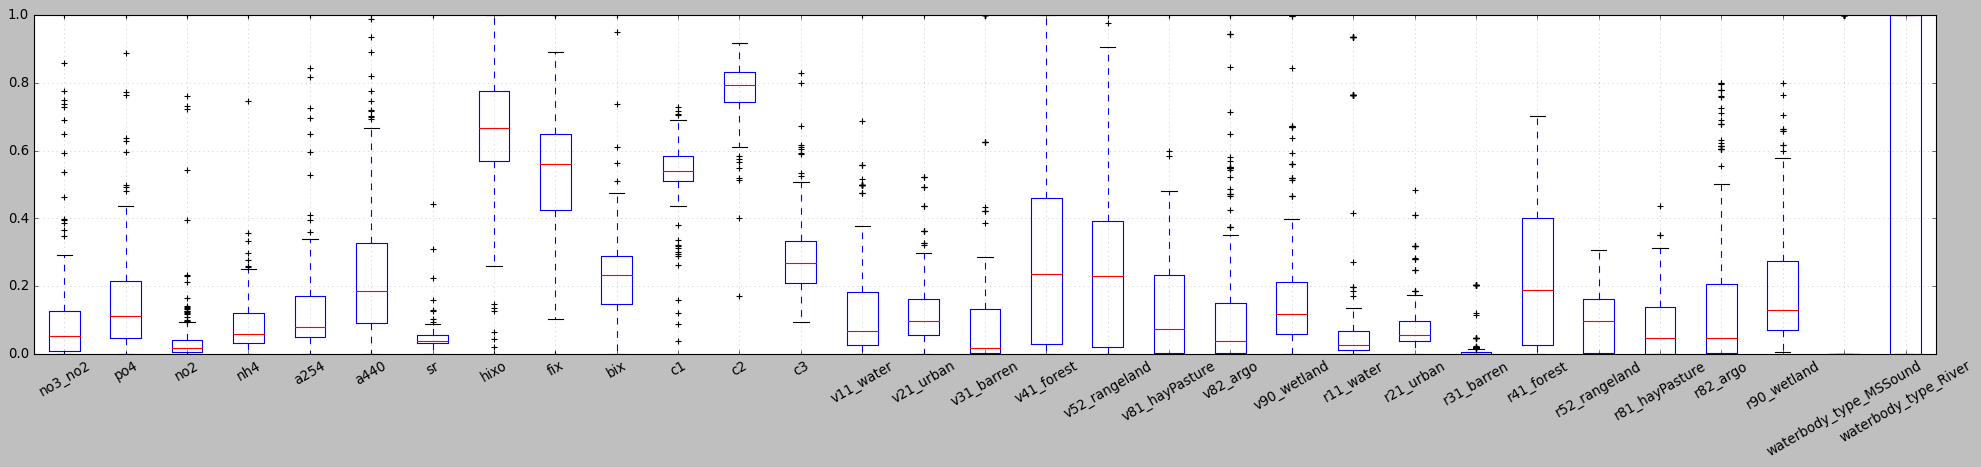

In [25]:
fg,ax = plt.subplots( figsize= (25,6) )

matplotlib.pyplot.grid( which= 'both', axis= 'both', alpha= 0.3 )                           # grid transparency

griFeature_df.boxplot( figsize= (25,6), ax= ax )

ax.set_xticklabels( labels= griFeature_df.columns, rotation= 30 )
plt.tight_layout(); plt.show()

In [19]:
%matplotlib inline

In [24]:
# %reset
# import utility_madhur
# !pip install pandas-datareader
# ! pip install missingno
# ! pip install fuzzywuzzy

# &emsp; &ensp; &nbsp; &thinsp;

#  import warnings; warnings.filterwarnings( action= 'ignore' )

# # to check whether a str is a python keyword
# import keyword

location = 'dataset/'
# add a directory in the system path for library import

from IPython.core.display import display, HTML
from IPython.display import display_html

display(  HTML( '<style>.container { width:42% !important; }</style>' )  )
import os, random, time, fsspec, datetime, requests, copy, itertools, sys
# import gunzip
import pandas as pd, pandas_datareader as pd_dr, re
import numpy as np, seaborn as sns
from numpy import savetxt
from numpy import genfromtxt
import sklearn, sklearn_pandas
from sklearn import *
import missingno as msno
import h5py, pickle
# import pyspark, urllib

import scipy, scipy.stats as stats, random, math
from sklearn.pipeline import Pipeline
from math import sqrt
import joblib, re

# import fuzzywuzzy
# from fuzzywuzzy import fuzz, process

import matplotlib, graphviz
import matplotlib.pyplot as plt
from matplotlib import *
# plt.style.use('Solarize_Light2')
plt.style.use( 'dark_background' )
%matplotlib inline

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost; import xgboost as xgb

import hdbscan

# keyword.iskeyword('str')
if 'E:\AI_courses\python-lib' not in sys.path:   sys.path.append( 'E:\AI_courses\python-lib' )
import DBCV

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## Set Jupyter notebook display options for pandas
pd.set_option( 'display.max_columns', None )
# pd.options.display.max_columns = 8
# pd.set_option('display.max_rows', None)
pd.options.display.max_rows = 5

%matplotlib inline

%config Completer.use_jedi = False

%matplotlib inline